<a href="https://colab.research.google.com/github/SunghyunUm/gnbai20201/blob/master/lab1/Umsunghyun/gnbailab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x : (100,)
y : (100,)


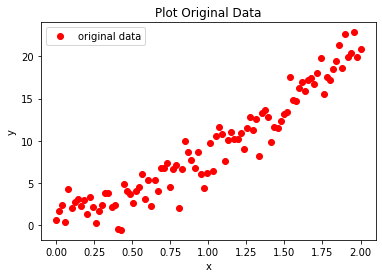

shape of x (100, 2)
shape of y (100, 1)


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

name_file = './data_lab1.txt'
columns = ['x', 'y']

data_in = pd.read_csv(name_file, names=columns, sep=' ')

# pandas dataframe으로부터 numpy 행렬로 바꾸기
x = np.asarray(data_in['x'])
y = np.asarray(data_in['y'])

print("x :", x.shape)
print("y :", y.shape)


# plt를 통해 데이터 plot 하기
plt.plot(x, y, 'ro', label='original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot Original Data')
plt.legend()
plt.show()

# x에 x0=1에 해당하는 열을 추가하여 x를 reshape하기
# 정상적으로 코딩했다면 x의 shape는 (100,)에서 (100, 2)가 되어야함
x = np.column_stack((np.ones_like(x), x))
print('shape of x', x.shape)

# 현재 1차원 배열 y를 열벡터로 reshape하기
# 정상적으로 코딩했다면 x의 shape는 (100,)에서 (100, 1)이 되어야함
y = y.reshape(-1, 1)
print('shape of y', y.shape)


# I : 입력 데이터의 개수
# N : 입력 데이터의 차원
I = x.shape[0]
N = x.shape[1] - 1


# 학습률, 에포크 수 설정 
# 두개의 값을 바꿔보면서 아래의 결과가 어떻게 다르게 나오는지 관찰해보세요!
alpha = 0.001
max_epoch = 10000


# plt를 통해 원본 데이터와 3개의 회귀자 plot 하기

# 그래프 상에 원본 데이터의 산점도와 직선 3개가 그려져있어야함

In [20]:
# 타이머 시작
start = time.time()
# 파라미터 랜덤 초기화
theta_BGD = np.random.rand(N+1, 1)

# 메인 루프
for epoch in range(max_epoch):
    # n 루프를 도는 중에 변경된 theta값을 사용하면 안되므로, 미리 값을 저장하여 사용합니다.
    theta_BGD_tp = np.transpose(theta_BGD)
    for n in range(0, N+1):
        gradient = 0.
        for i in range(0, I):
            gradient += (np.matmul(theta_BGD_tp, x[i]) - y[i]) * x[i][n]
        theta_BGD[n] = theta_BGD[n] - alpha * gradient

# 학습에 소요된 시간 출력
print('time :', time.time() - start)

# 학습된 파라미터 출력
print(theta_BGD)



time : 11.438347339630127
[[-0.94710665]
 [10.23574237]]


In [27]:
# SGD코드

# 타이머 시작
starts = time.time()
# 파라미터 랜덤 초기화
theta_SGD = np.random.rand(N+1, 1)
# 메인 루프
for epoch in range(max_epoch):
    #전치행렬..넣는다 미리값저장
    theta_SGD_tp = np.transpose(theta_SGD)
    for n in range(0, N+1):
        gradient = 0.
        i = random.randint(0,I-1)
        gradient += (np.matmul(theta_SGD_tp, x[i]) - y[i]) * x[i][n]
        theta_SGD[n] = theta_SGD[n] - alpha * gradient

# 학습에 소요된 시간 출력
print('time :', time.time() - starts)
# 학습된 파라미터 출력
print(theta_SGD)




time : 0.36517786979675293
[[0.22028051]
 [9.2098343 ]]


In [24]:
# 타이머 시작
start = time.time()
# 공식으로 파라미터 계산
f = np.transpose(x)
g = np.matmul(f, x)
j = np.linalg.inv(g)
h = np.matmul(f, y)
theta_OLS = np.matmul(j, h)

# 계산에 소요된 시간 출력
print('time :', time.time() - start)
# 파라미터 출력
print(theta_OLS)



time : 0.0010459423065185547
[[-0.94710665]
 [10.23574237]]
